In [17]:
import torch.nn as nn
import os
import glob
import torch

In [5]:
path = r'C:\Users\user\OneDrive\Documents\code\face-mask-detector\face-mask-detector\dataset'

In [10]:
images = glob.glob(os.path.join(path, '*//*.jpg'))

In [14]:
print('Total no of files are {}'.format(len(images)))


Total no of files are 1376


In [1]:
from sklearn.model_selection import train_test_split

In [161]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.activations import relu, softmax
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy
from matplotlib.pyplot import imshow

In [154]:
img_cols , img_rows =28,28
num_classes = 10

In [151]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

5

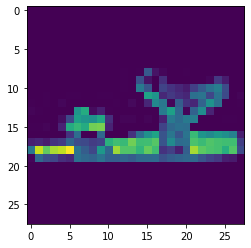

In [159]:
imshow(trainX[59999])
trainY[59999]

In [135]:
trainX.shape

(60000, 28, 28)

In [136]:

    train_Y = to_categorical(trainY, num_classes)
    test_Y = to_categorical(testY, num_classes)
    
    train_X = trainX.reshape(trainX.shape[0], img_cols, img_rows, 1)
    test_X = testX.reshape(testX.shape[0], img_cols, img_rows, 1)
    
    train_X = train_X.astype("float32") / 255.0
    test_X = test_X.astype("float32") / 255.0
    
  
    
    


In [137]:
train_X.shape

(60000, 28, 28, 1)

In [138]:


batch = 24
epoch =20


In [139]:
layers = Sequential()

In [140]:
layers.add(Conv2D(24, strides = (2,2),kernel_size =(3,3), activation =relu, input_shape =(img_rows, img_cols,1)))
layers.add(Conv2D(24, activation =relu, kernel_size = (3,3)))
layers.add(MaxPooling2D(pool_size=(2, 2)))
layers.add(Flatten())

layers.add(Dense(128, activation =relu))
layers.add(Dropout(0.5))
layers.add(Dense(num_classes, activation = softmax))

In [141]:
layers.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 13, 13, 24)        240       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 11, 11, 24)        5208      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 24)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 600)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               76928     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)              

In [142]:
layers.compile(loss=categorical_crossentropy, optimizer = 'SGD', metrics =[ 'accuracy'])

In [143]:
layers.fit(train_X, train_Y,  batch_size =batch, epochs =epoch, validation_data = (test_X, test_Y))

Epoch 1/20
2500/2500 [==============================] - 46s 18ms/step - loss: 0.9370 - accuracy: 0.6630 - val_loss: 0.6008 - val_accuracy: 0.7820
Epoch 2/20
2500/2500 [==============================] - 39s 16ms/step - loss: 0.6061 - accuracy: 0.7793 - val_loss: 0.5254 - val_accuracy: 0.7977
Epoch 3/20
2500/2500 [==============================] - 43s 17ms/step - loss: 0.5441 - accuracy: 0.8008 - val_loss: 0.4736 - val_accuracy: 0.8200
Epoch 4/20
2500/2500 [==============================] - 42s 17ms/step - loss: 0.5059 - accuracy: 0.8157 - val_loss: 0.4470 - val_accuracy: 0.8335
Epoch 5/20
2500/2500 [==============================] - 40s 16ms/step - loss: 0.4811 - accuracy: 0.8249 - val_loss: 0.4365 - val_accuracy: 0.8350
Epoch 6/20
2500/2500 [==============================] - 41s 17ms/step - loss: 0.4600 - accuracy: 0.8311 - val_loss: 0.4219 - val_accuracy: 0.8397
Epoch 7/20
2500/2500 [==============================] - 46s 19ms/step - loss: 0.4422 - accuracy: 0.8383 - val_loss: 0.4036 -

In [144]:
vals = layers.predict(test_X)

In [147]:
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [145]:
fad = np.argmax(vals, axis=1)

In [148]:
print(classification_report(test_Y.argmax(axis=1), fad,
	target_names=labelNames))

              precision    recall  f1-score   support

         top       0.83      0.83      0.83      1000
     trouser       0.99      0.96      0.98      1000
    pullover       0.79      0.83      0.81      1000
       dress       0.84      0.91      0.88      1000
        coat       0.79      0.78      0.79      1000
      sandal       0.97      0.97      0.97      1000
       shirt       0.69      0.60      0.65      1000
     sneaker       0.92      0.96      0.94      1000
         bag       0.96      0.98      0.97      1000
  ankle boot       0.97      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [149]:
testY

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)